In [1]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

In [8]:
!/Users/silvia/opt/anaconda3/bin/python3 /Users/silvia/Desktop/jupyter-navbar-master/setup.py

Creating directory structure
Copying necessary files
Traceback (most recent call last):
  File "/Users/silvia/Desktop/jupyter-navbar-master/setup.py", line 32, in <module>
    shutil.copyfile(name, target)
  File "/Users/silvia/opt/anaconda3/lib/python3.7/shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: 'navbar.css'


In [57]:
import numpy as np
import pandas as pd

In [128]:
alp = [chr(x) for x in range(ord('a'), ord('z') + 1)]

In [70]:
# test
ncol = 10
df = pd.DataFrame(np.random.rand(100,ncol), columns = ['Y'] + alp[:ncol-1])
df

,Y,a,b,c,d,e,f,g,h,i
0,0.387529,0.425310,0.510009,0.531293,0.879415,0.717303,0.498320,0.029916,0.712675,0.490898
1,0.864926,0.401659,0.798173,0.369426,0.491640,0.701778,0.210393,0.699185,0.782519,0.759716
2,0.730754,0.238299,0.948557,0.277242,0.296627,0.539865,0.066170,0.037404,0.993835,0.040385
3,0.123258,0.162917,0.169395,0.256439,0.698971,0.811325,0.807450,0.437022,0.468562,0.087723
4,0.732579,0.251616,0.434659,0.635124,0.250221,0.418606,0.069816,0.653540,0.382762,0.783074
...,...,...,...,...,...,...,...,...,...,...
95,0.827119,0.619119,0.760110,0.902035,0.793325,0.549889,0.700301,0.340021,0.946308,0.943755
96,0.910496,0.448485,0.441120,0.090961,0.040780,0.518264,0.175147,0.062928,0.103730,0.529514
97,0.977979,0.995433,0.524310,0.004351,0.474944,0.526743,0.425037,0.179344,0.046495,0.122892
98,0.743542,0.173305,0.431242,0.419274,0.361661,0.960040,0.216498,0.773711,0.177325,0.886849


In [71]:
bins= [0,0.33,0.66,1]
labels = ['S','M','L']
df['category'] = pd.cut(df.a, bins=bins, labels=labels, right=False)
df

,Y,a,b,c,d,e,f,g,h,i,category
0,0.387529,0.425310,0.510009,0.531293,0.879415,0.717303,0.498320,0.029916,0.712675,0.490898,M
1,0.864926,0.401659,0.798173,0.369426,0.491640,0.701778,0.210393,0.699185,0.782519,0.759716,M
2,0.730754,0.238299,0.948557,0.277242,0.296627,0.539865,0.066170,0.037404,0.993835,0.040385,S
3,0.123258,0.162917,0.169395,0.256439,0.698971,0.811325,0.807450,0.437022,0.468562,0.087723,S
4,0.732579,0.251616,0.434659,0.635124,0.250221,0.418606,0.069816,0.653540,0.382762,0.783074,S
...,...,...,...,...,...,...,...,...,...,...,...
95,0.827119,0.619119,0.760110,0.902035,0.793325,0.549889,0.700301,0.340021,0.946308,0.943755,M
96,0.910496,0.448485,0.441120,0.090961,0.040780,0.518264,0.175147,0.062928,0.103730,0.529514,M
97,0.977979,0.995433,0.524310,0.004351,0.474944,0.526743,0.425037,0.179344,0.046495,0.122892,L
98,0.743542,0.173305,0.431242,0.419274,0.361661,0.960040,0.216498,0.773711,0.177325,0.886849,S


# correlation test 

检查各feature之间是否有相关性

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
def draw_corr(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

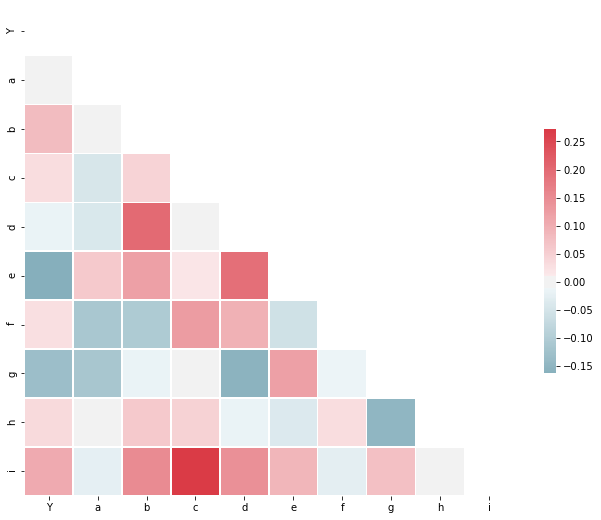

In [74]:
draw_corr(df.corr())

# two sample t test 

检查两组的平均值是否相同

In [75]:
from scipy import stats

In [107]:
rvs1 = df.a
rvs2 = df.b
T, p = stats.ttest_ind(rvs1,rvs2)
print('T-Statistic=%.3f, p=%.3f' % (T, p))

T-Statistic=0.708, p=0.480


# anova for linear regression 

检查哪个feature是significant predictor

In [78]:
all_cols = "+".join([x for x in df.columns[1:-1]])
all_cols

'a+b+c+d+e+f+g+h+i'

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [131]:
test_lm = ols('Y ~ ' + all_cols, data = df).fit()

In [93]:
# test_lm.summary()

In [82]:
reg_anova = sm.stats.anova_lm(test_lm)
reg_anova

,df,sum_sq,mean_sq,F,PR(>F)
a,1.0,0.000032,0.000032,0.000388,0.984328
b,1.0,0.051423,0.051423,0.624562,0.431434
c,1.0,0.006273,0.006273,0.076194,0.783157
d,1.0,0.008624,0.008624,0.104749,0.746954
e,1.0,0.236390,0.236390,2.871117,0.093640
f,1.0,0.006463,0.006463,0.078496,0.779989
g,1.0,0.101103,0.101103,1.227966,0.270756
h,1.0,0.000029,0.000029,0.000352,0.985082
i,1.0,0.105508,0.105508,1.281467,0.260634
Residual,90.0,7.410033,0.082334,NaN,NaN


# one way anova 
检查一个feature中的不同组的mean是否相同

In [84]:
s = df[df.category == 'S'].Y
m = df[df.category == 'M'].Y
l = df[df.category == 'L'].Y

F, p = stats.f_oneway(s, m, l)
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=0.053, p=0.948


In [149]:
ols('Y~C(category)', data = df).fit().fvalue

0.053430131752667254

# tukey pairwise test 
检查一个feature中的不同组的mean是否两两相同


In [85]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [87]:
tukey = pairwise_tukeyhsd(endog=df.Y,
                          groups=df.category,
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     L      M   0.0137   0.9 -0.1505 0.1779  False
     L      S  -0.0097   0.9 -0.1753 0.1559  False
     M      S  -0.0234   0.9 -0.1948  0.148  False
--------------------------------------------------


# one way ancova 
控制另一个feature  检查一个feature中的不同组的mean是否相同

In [121]:
!pip install pingouin

     |████████████████████████████████| 204 kB 94 kB/s eta 0:00:01
     |████████████████████████████████| 759 kB 685 kB/s eta 0:00:01
  Created wheel for pingouin: filename=pingouin-0.3.11-py3-none-any.whl size=203323 sha256=1db3be4d8b074d829cdb803a4308c6da6531616fd1d87e858bdce4ebda3fda5f
  Stored in directory: /Users/silvia/Library/Caches/pip/wheels/74/6d/d2/9320ff7695f6983f4394c10630792f4bd4c8351facfd39b649
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=c52d9cc8ece4aab3041c5e2c769045975cf0b2bb3edd598c0511d48b92651078
  Stored in directory: /Users/silvia/Library/Caches/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [150]:
from pingouin import ancova

#perform ANCOVA
ancova(data=df, dv='Y', between='category', covar='c')

,Source,SS,DF,F,p-unc,np2
0,category,0.010538,2,0.063967,0.938076,0.001331
1,c,0.009832,1,0.119364,0.730481,0.001242
2,Residual,7.907324,96,NaN,NaN,NaN


Dummy variable的方法FAIL了，待研究

In [138]:
df_dummy = pd.concat([df.Y, pd.get_dummies(df.category)], axis = 1)

In [139]:
# import random

# c1 = [0]*int(len(df_dummy)/2) + [1]*(len(df_dummy) - int(len(df_dummy)/2))
# c2 = [0]*int(len(df_dummy)/2) + [1]*(len(df_dummy) - int(len(df_dummy)/2))
# random.shuffle(c1)
# random.shuffle(c2)
# df_dummy['c1'] = c1
# df_dummy['c2'] = c2
# df_dummy


In [141]:
df_dummy['c'] = df.c

In [147]:
ancova1 = ols('Y ~ S + M + L + c', data = df_dummy).fit()
# ancova1.summary()
ancova1.fvalue

0.07508465435948238

In [148]:
ancova2 = ols('Y~C(category) + c', data = df).fit()
# ancova2.summary()
ancova2.fvalue

0.07508465435947877